<a href="https://colab.research.google.com/github/rsharma1996/CS4442B_Assignment3/blob/master/CS4442B_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()
#will open an upload dialogue window where you can browse and select your local files for upload.



for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv
Saving t10k-images-idx3-ubyte to t10k-images-idx3-ubyte
Saving t10k-labels-idx1-ubyte to t10k-labels-idx1-ubyte
Saving train-images-idx3-ubyte to train-images-idx3-ubyte
Saving train-labels-idx1-ubyte to train-labels-idx1-ubyte
User uploaded file "fashion-mnist_test.csv" with length 22176691 bytes
User uploaded file "fashion-mnist_train.csv" with length 133047193 bytes
User uploaded file "t10k-images-idx3-ubyte" with length 7840016 bytes
User uploaded file "t10k-labels-idx1-ubyte" with length 10008 bytes
User uploaded file "train-images-idx3-ubyte" with length 47040016 bytes
User uploaded file "train-labels-idx1-ubyte" with length 60008 bytes


In [0]:
#reading contents
import numpy as np
import pandas as pd
#reading the csv files
train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")

In [5]:
#checking data
print(train.shape)
ntrain = train.shape[0]

print(test.shape)
ntest = test.shape[0]

train.head(10)

(60000, 785)
(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [6]:
#Data type
print(train.dtypes[0]) # int64, otherwise do train = train.astype('int64')

print(train.dtypes[0]) # int64, otherwise do test = test.astype('int64')

int64
int64


In [7]:
# extract xtrain, ytrain

# array containing labels of each image
ytrain = train["label"]
# dataframe containing all pixels (the label column is dropped)
xtrain = train.drop("label", axis=1)

# the images are in square form, so dim*dim = 784
from math import sqrt
dim = int(sqrt(xtrain.shape[1]))
print("The images are {}x{} squares.".format(dim, dim))

print("Shape of xtrain: ", xtrain.shape)
print("Shape of ytrain: ", ytrain.shape)


# array containing labels of each image
ytest = test["label"]
# dataframe containing all pixels (the label column is dropped)
xtest = test.drop("label", axis=1)
print("Shape of xtest: ", xtest.shape)
print("Shape of ytest: ", ytest.shape)

The images are 28x28 squares.
Shape of xtrain:  (60000, 784)
Shape of ytrain:  (60000,)
Shape of xtest:  (10000, 784)
Shape of ytest:  (10000,)


In [8]:
ytrain.head(5)

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(60000,)
<class 'pandas.core.series.Series'>
9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64
The mean amount of elements per class is 6000.0
The standard deviation in the element per class distribution is 0.0


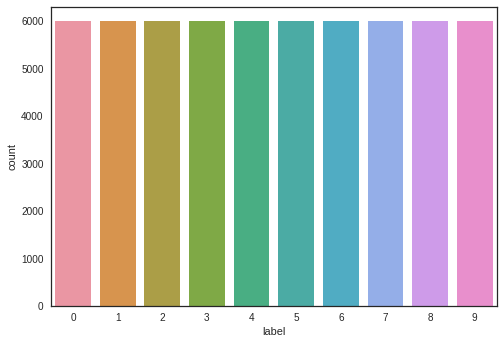

In [9]:
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# plot how many images there are in each class
sns.countplot(ytrain)

print(ytrain.shape)
print(type(ytrain))

# array with each class and its number of images
vals_class = ytrain.value_counts()
print(vals_class)

# mean and std
cls_mean = np.mean(vals_class)
cls_std = np.std(vals_class,ddof=1)

print("The mean amount of elements per class is", cls_mean)
print("The standard deviation in the element per class distribution is", cls_std)

# 68% - 95% - 99% rule, the 68% of the data should be cls_std away from the mean and so on
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
if cls_std > cls_mean * (0.6827 / 2):
    print("The standard deviation is high")
    
# if the data is skewed then we won't be able to use accurace as its results will be misleading and we may use F-beta score instead.

In [10]:
def check_nan(df):
    print(df.isnull().any().describe())
    print("There are missing values" if df.isnull().any().any() else "There are no missing values")

    if df.isnull().any().any():
        print(df.isnull().sum(axis=0))
        
    print()
        
check_nan(xtrain)
check_nan(xtest)

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values

count       784
unique        1
top       False
freq        784
dtype: object
There are no missing values



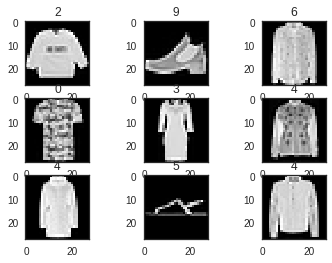

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# convert train dataset to (num_images, img_rows, img_cols) format in order to plot it
xtrain_vis = xtrain.values.reshape(ntrain, dim, dim)

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
# subplot(2,3,3) = subplot(233)
# a grid of 3x3 is created, then plots are inserted in some of these slots
for i in range(0,9): # how many imgs will show from the 3x3 grid
    plt.subplot(330 + (i+1)) # open next subplot
    plt.imshow(xtrain_vis[i], cmap=plt.get_cmap('gray'))
    plt.title(ytrain[i]);

In [0]:
# Normalize the data
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [13]:
# reshape of image data to (nimg, img_rows, img_cols, 1)
def df_reshape(df):
    print("Previous shape, pixels are in 1D vector:", df.shape)
    df = df.values.reshape(-1, dim, dim, 1) 
    # -1 means the dimension doesn't change, so 42000 in the case of xtrain and 28000 in the case of test
    print("After reshape, pixels are a 28x28x1 3D matrix:", df.shape)
    return df

xtrain = df_reshape(xtrain) # numpy.ndarray type
xtest = df_reshape(xtest) # numpy.ndarray type

Previous shape, pixels are in 1D vector: (60000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (60000, 28, 28, 1)
Previous shape, pixels are in 1D vector: (10000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (10000, 28, 28, 1)


In [14]:
#One-Hot labelling
from keras.utils.np_utils import to_categorical

print(type(ytrain))
# number of classes, in this case 10
nclasses = ytrain.max() - ytrain.min() + 1

print("Shape of ytrain before: ", ytrain.shape) # (42000,)

ytrain = to_categorical(ytrain, num_classes = nclasses)

print("Shape of ytrain after: ", ytrain.shape) # (42000, 10), also numpy.ndarray type
print(type(ytrain))

Using TensorFlow backend.


<class 'pandas.core.series.Series'>
Shape of ytrain before:  (60000,)
Shape of ytrain after:  (60000, 10)
<class 'numpy.ndarray'>


In [15]:
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

# percentage of xtrain which will be xval
split_pct = 0.2

# Split the train and the validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain,
                                              ytrain, 
                                              test_size=split_pct,
                                              random_state=seed,
                                              stratify=ytrain
                                             )

print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(48000, 28, 28, 1) (48000, 10) (12000, 28, 28, 1) (12000, 10)


In [0]:
#CNN
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [17]:
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
#Learning rate annealer
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

In [0]:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images

#datagen.fit(xtrain)

In [0]:
#Epochs and batch size
epochs = 1
batch_size = 256

In [23]:
# history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
#                               epochs=epochs, 
#                               validation_data=(xval,yval),
#                               verbose=1, 
#                               steps_per_epoch=xtrain.shape[0] // batch_size, 
#                               callbacks=[lr_reduction])


history = model.fit(x=xtrain, 
                    y=ytrain, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    callbacks=[lr_reduction],
                    validation_data=(xval,yval), 
                    shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 542s 11ms/step - loss: 0.6421 - acc: 0.7620 - val_loss: 0.3840 - val_acc: 0.8603


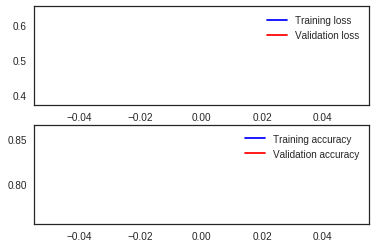

In [24]:
#Plot loss and accuracy
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

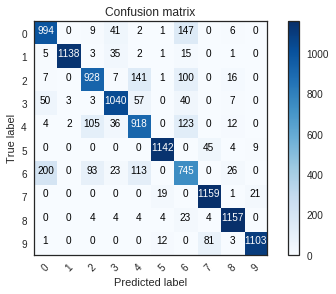

In [25]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
ypred_onehot = model.predict(xval)
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
# Convert validation observations from one hot vectors to labels
ytrue = np.argmax(yval,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

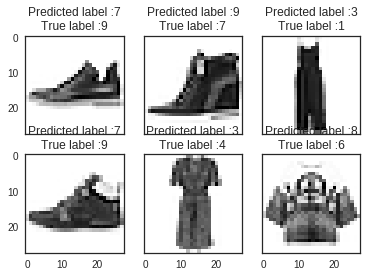

In [26]:
errors = (ypred - ytrue != 0) # array of bools with true when there is an error or false when the image is cor

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

In [27]:
from sklearn.metrics import accuracy_score 
#xtest = xtest.reshape(-1, dim, dim, nchannels)
ypredtest = model.predict_classes(xtest)
print("test_acc", accuracy_score(ytest.values, ypredtest))

test_acc 0.8683
